# #readMoreCanlit | Notebook 2: Data cleaning and visualization

<center><img src='../img/readMoreCanlit.png'></center>

<a name="contents"></a>
## Contents

* <a href="#overview">Overview</a><br>
* <a href="#imports">Imports</a><br>
* <a href="#data-manipulation">Data manipulation</a><br>
* <a href="#visualization">Visualization</a><br>

<a name="overview"></a>
## Overview

This section of the notebook involves manipulating the text in ways that help with how I want the application to display it. The Canadian and international dataframes are concatenated rows-size into one, and several new features are added: (1) the author and title information is concatenated column-wise into a single feature, and title, author and description information are likewise concatenated into a single details feature that contains all information regarding each book. Columns containing the word count and character count for each details section are added, and some visualization has been implemented to help bring the data to life.

<a name="imports"></a>
## Imports

In [13]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from collections import Counter
from wordcloud import STOPWORDS, WordCloud

# This magic line will allow you to generate plots within the Jupyter notebook
%matplotlib inline
pd.options.display.max_seq_items = 2000
pd.options.display.max_rows = 4000

<div style="text-align: right">(<a href="#contents">home</a>) </div>

<a name="data-manipulation"></a>
## Data manipulation

Let's concatenate a few columns to set up the data the way our presentation layer will eventually want it displayed. And let's calculate a few numerical columns that we can use for visualization purposes.

In [5]:
# Original data manipulation code pre-function

# First the Canadian dataset
canadian = pd.read_csv('../data/processed/canadian_pre.csv', encoding = "ISO-8859-1")
canadian = canadian.applymap(str)
canadian.dropna(axis = 0, how ='any', inplace = True)
canadian['book'] = canadian['title'] + ' by ' + canadian['author']
canadian['details'] = canadian['book'] + ': ' + canadian['description']
canadian.drop(['description'], axis=1, inplace=True)
canadian['character_count'] = canadian['details'].astype(str).apply(len)
canadian['word_count'] = canadian['details'].apply(lambda x: len(str(x).split()))
canadian.to_csv('../data/processed/canadian_post.csv')

# And then the international one
international = pd.read_csv('../data/processed/international_pre.csv', encoding = "ISO-8859-1")
international = international.applymap(str)
international.dropna(axis = 0, how ='any', inplace = True)
international['book'] = international['title'] + ' by ' + international['author']
international['details'] = international['book'] + ': ' + international['description']
international.drop(['description'], axis=1, inplace=True)
international['character_count'] = international['details'].astype(str).apply(len)
international['word_count'] = international['details'].apply(lambda x: len(str(x).split()))
international.to_csv('../data/processed/international_post.csv')

In [12]:
# Let's have a look
print(type(canadian[id]))

KeyError: 2355549177928

In [7]:
# Concatenate the two dataframes rows-wise so we have one source for our corpus

books = pd.concat([canadian, international])

In [8]:
books.tail()

,id,origin,title,author,image_name,book,details,character_count,word_count
10357,20358,international,Zinn's Cycling Primer: Maintenance Tips And Sk...,Lennard Zinn,nan,Zinn's Cycling Primer: Maintenance Tips And Sk...,Zinn's Cycling Primer: Maintenance Tips And Sk...,879,131
10358,20359,international,"Zone Food Blocks: The Quick And Easy, Mix-and-...",Barry Sears,nan,"Zone Food Blocks: The Quick And Easy, Mix-and-...","Zone Food Blocks: The Quick And Easy, Mix-and-...",1167,179
10359,20360,international,Zoning And Property Rights,Robert H. Nelson,nan,Zoning And Property Rights by Robert H. Nelson,Zoning And Property Rights by Robert H. Nelson...,2060,289
10360,20361,international,Zoo's Who,Douglas Florian,nan,Zoo's Who by Douglas Florian,Zoo's Who by Douglas Florian: <p>Climb on into...,420,57
10361,20362,international,Zuppe: Soups From The Kitchen Of The American ...,Mona Talbott,nan,Zuppe: Soups From The Kitchen Of The American ...,Zuppe: Soups From The Kitchen Of The American ...,1613,252


In [10]:
# Reset the index to avoid conflicts between the indices of the two former dataframes

books.reset_index(drop=True)
books

,id,origin,title,author,image_name,book,details,character_count,word_count
0,0,Canadian,88,Michael Fletcher,88.jpg,88 by Michael Fletcher,88 by Michael Fletcher: The dream of Artificia...,1564,251
1,1,Canadian,419,Will Ferguson,419.jpg,419 by Will Ferguson,419 by Will Ferguson: From internationally bes...,1254,207
2,2,Canadian,1978,Daniel Jones,1978.jpg,1978 by Daniel Jones,"1978 by Daniel Jones: In this violent, raw, an...",746,124
3,3,Canadian,1979,Ray Robertson,1979.jpg,1979 by Ray Robertson,1979 by Ray Robertson: Itâs 1979 and Tom Buz...,847,151
4,4,Canadian,2113,Kevin J. Anderson,2113.jpg,2113 by Kevin J. Anderson,2113 by Kevin J. Anderson: 18 exhilarating jou...,1405,216
...,...,...,...,...,...,...,...,...,...
10357,20358,international,Zinn's Cycling Primer: Maintenance Tips And Sk...,Lennard Zinn,nan,Zinn's Cycling Primer: Maintenance Tips And Sk...,Zinn's Cycling Primer: Maintenance Tips And Sk...,879,131
10358,20359,international,"Zone Food Blocks: The Quick And Easy, Mix-and-...",Barry Sears,nan,"Zone Food Blocks: The Quick And Easy, Mix-and-...","Zone Food Blocks: The Quick And Easy, Mix-and-...",1167,179
10359,20360,international,Zoning And Property Rights,Robert H. Nelson,nan,Zoning And Property Rights by Robert H. Nelson,Zoning And Property Rights by Robert H. Nelson...,2060,289
10360,20361,international,Zoo's Who,Douglas Florian,nan,Zoo's Who by Douglas Florian,Zoo's Who by Douglas Florian: <p>Climb on into...,420,57


In [11]:
# Save a copy back to disk

books.to_csv('../data/processed/books.csv')

<div style="text-align: right">(<a href="#contents">home</a>) </div>

<a name="visualization"></a>
## Visualization

#### Word clouds

In [45]:
literary_stopwords = ['amazon best book of the year', 'arthur ellis', 'astonishing', 'author', 'award', 'award-winning', 'best', 'best book of the year', 'bestseller', 'bestselling', 'book', 'book award', 'boston globe', 'canada reads', 'category', 'character', 'classic', 'critically acclaimed', 'debut', 'entertainment weekly', 'epic', 'finalist', 'finalist', 'foremost', 'giller prize', 'giller prize', 'globe and mail', 'governor generals award', 'governor generals literary award', 'harpercollins', 'heralded', 'highly anticipated', 'kobo', 'literary', 'literature', 'longlisted', 'national bestseller', 'nationally', 'new york times', 'novel', 'prize', 'prize-winning', 'publish', 'publishers weekly', 'rogers writers trust', 'scotiabank', 'shortlisted', 'story', 'ubc', 'widely anticipated', 'winner', 'writers trust fiction prize', 'writers trust of canada']
stoplist = set(stopwords.words('english') + list(punctuation) + literary_stopwords)
path = '../data/processed/canadian_post.csv'
df = pd.read_csv(path)
df = df.applymap(str)
texts = df['details'].str.lower()
word_counts = Counter(word_tokenize('\n'.join(texts)))
words_list = word_counts.most_common()
words_list



[('the', 12555),
 (',', 10921),
 ('by', 7746),
 ('of', 7363),
 ('a', 7358),
 (':', 7330),
 ('...', 6801),
 ('and', 5360),
 ('.', 4626),
 ('in', 4418),
 ('to', 3370),
 ("'s", 3200),
 ('is', 3055),
 ('her', 1777),
 ('for', 1734),
 ('with', 1421),
 ('his', 1396),
 ('from', 1253),
 ('an', 1176),
 ('on', 1149),
 (';', 1083),
 ('that', 909),
 ('novel', 872),
 ('``', 872),
 ('she', 869),
 ('as', 838),
 ('this', 834),
 ('has', 825),
 ('he', 811),
 ('new', 759),
 ('?', 751),
 ('it', 740),
 ('when', 688),
 ('at', 676),
 ('one', 670),
 ("''", 665),
 ('life', 664),
 ('stories', 646),
 ('but', 586),
 ('story', 550),
 ('who', 549),
 ('author', 502),
 ('are', 485),
 ('was', 478),
 ('family', 469),
 ('you', 460),
 ('about', 459),
 ('book', 449),
 ('young', 441),
 ('first', 434),
 ('world', 429),
 ('love', 420),
 ('their', 399),
 ('be', 388),
 ('man', 380),
 ('fiction', 367),
 ('collection', 355),
 ("n't", 355),
 ('all', 348),
 ('into', 347),
 ('two', 345),
 ('after', 335),
 ('woman', 316),
 ('up', 302

<img src='../img/canadian_word_cloud.png'>

In [49]:
canadian_words = pd.read_csv('../data/processed/canadian_words.csv')

In [50]:
canadian_words

,id,word,count
0,1,life,615
1,2,young,422
2,3,family,418
3,4,world,380
4,5,love,324
5,6,man,308
6,7,woman,288
7,8,years,284
8,9,short,230
9,10,home,228


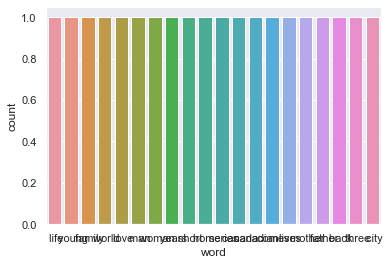

In [57]:
sns.set(style="darkgrid")
ax = sns.countplot(x="word", data=canadian_words)

<div style="text-align: right">(<a href="#contents">home</a>) </div>

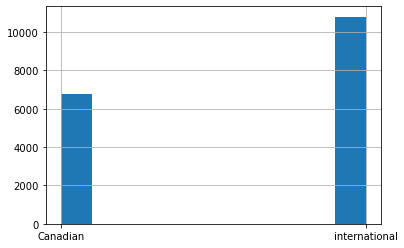

In [39]:
books['origin'].hist()

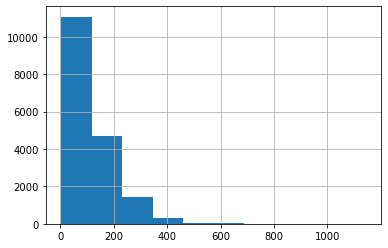

In [40]:
books['word_count'].hist()

These visualizations are obviously not that good and this section is a work in progress! In the next section, I implement the recommender system.

<div style="text-align: right">(<a href="#contents">home</a>) </div>